# Cluster Analysis of Leaf Samples
### Rania Hamid


Using k-means clustering algorithm to identify leaves

## Install packages, load libraries

In [1]:
# load libraries
import pandas as pd
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
from sklearn.preprocessing import StandardScaler




## Load Data and Assign Column Names


In [3]:
# load the dataset and assign column names from ReadMe (Appendix A)
col_names = ['Class', 'Specimen Number', 'Eccentricity', 'Aspect Ratio', 'Elongation',
             'Solidity', 'Stochastic Convexity', 'Isoperimetric Factor', 'Max Indentation Depth',
             'Lobedness', 'Average Intensity', 'Average Contrast', 'Smoothness',
             'Third Moment', 'Uniformity', 'Entropy']

df = pd.read_csv("C:/Users/Rania/OneDrive/Documents/UMGC/DATA 645 - Machine Learning/Unit 8/leaf/leaf.csv", header=None, names=col_names)  


In [7]:
df.head()
# drop non-feature columns
df_features = df.drop(columns=['Class','Specimen Number'])
df_features.head()

,Eccentricity,Aspect Ratio,Elongation,Solidity,Stochastic Convexity,Isoperimetric Factor,Max Indentation Depth,Lobedness,Average Intensity,Average Contrast,Smoothness,Third Moment,Uniformity,Entropy
0,0.72694,1.4742,0.32396,0.98535,1.00000,0.83592,0.004657,0.003947,0.047790,0.127950,0.016108,0.005232,0.000275,1.17560
1,0.74173,1.5257,0.36116,0.98152,0.99825,0.79867,0.005242,0.005002,0.024160,0.090476,0.008119,0.002708,0.000075,0.69659
2,0.76722,1.5725,0.38998,0.97755,1.00000,0.80812,0.007457,0.010121,0.011897,0.057445,0.003289,0.000921,0.000038,0.44348
3,0.73797,1.4597,0.35376,0.97566,1.00000,0.81697,0.006877,0.008607,0.015950,0.065491,0.004271,0.001154,0.000066,0.58785
4,0.82301,1.7707,0.44462,0.97698,1.00000,0.75493,0.007428,0.010042,0.007938,0.045339,0.002051,0.000560,0.000024,0.34214


## Summary Statistics

In [16]:
# Check data types
print("Data Types: \n", df_scaled.dtypes)

Data Types: 
 Eccentricity             float64
Aspect Ratio             float64
Elongation               float64
Solidity                 float64
Stochastic Convexity     float64
Isoperimetric Factor     float64
Max Indentation Depth    float64
Lobedness                float64
Average Intensity        float64
Average Contrast         float64
Smoothness               float64
Third Moment             float64
Uniformity               float64
Entropy                  float64
dtype: object


 All data types are floats;  clustering algorithms are designed to work on real-valued data so transformation to integer is unecessary 

In [17]:
# Get unique values for each column
for column in df_features.columns:
    print(f"{column}: {df_scaled[column].nunique()}")

Eccentricity: 339
Aspect Ratio: 334
Elongation: 339
Solidity: 333
Stochastic Convexity: 88
Isoperimetric Factor: 339
Max Indentation Depth: 340
Lobedness: 339
Average Intensity: 338
Average Contrast: 339
Smoothness: 339
Third Moment: 340
Uniformity: 339
Entropy: 337


In [13]:
# Check for missing values
print("Missing Values: \n", df_features.isnull().sum())

Missing Values: 
 Eccentricity             0
Aspect Ratio             0
Elongation               0
Solidity                 0
Stochastic Convexity     0
Isoperimetric Factor     0
Max Indentation Depth    0
Lobedness                0
Average Intensity        0
Average Contrast         0
Smoothness               0
Third Moment             0
Uniformity               0
Entropy                  0
dtype: int64


In [21]:
# Check for duplicates
print("Duplicate Rows: \n", df_features.duplicated().sum())

Duplicate Rows: 
 0


## Exploratory Data Analysis (EDA)
**Goals of EDA:**
1. Understand dataset features
2. Examine feature distributions to see how they differ; use PCA to identify key features
3. Identify any surprising patterns or outliers  

In [19]:
df_features.describe().T

,count,mean,std,min,25%,50%,75%,max
Eccentricity,340.0,0.719854,0.208311,0.117080,0.550623,0.763450,0.895097,0.998710
Aspect Ratio,340.0,2.440210,2.599043,1.006600,1.211300,1.570750,2.343100,19.038000
Elongation,340.0,0.513760,0.195583,0.107610,0.349623,0.501855,0.633373,0.948340
Solidity,340.0,0.904158,0.114639,0.485490,0.890667,0.948130,0.976897,0.993880
Stochastic Convexity,340.0,0.943793,0.115047,0.396490,0.966230,0.992980,1.000000,1.000000
Isoperimetric Factor,340.0,0.531234,0.217532,0.078376,0.346818,0.579160,0.700713,0.858160
Max Indentation Depth,340.0,0.037345,0.038575,0.002837,0.009521,0.023860,0.047834,0.198980
Lobedness,340.0,0.523845,1.039639,0.001464,0.016500,0.103615,0.416432,7.206200
Average Intensity,340.0,0.051346,0.035965,0.005022,0.022843,0.042087,0.073046,0.190670
Average Contrast,340.0,0.124535,0.051860,0.033415,0.083362,0.119375,0.163795,0.280810


**Central tendency**
Most features are roughly centered near their means and medians; however, the means span very different scales.  

Mean vs median (50th percentile) comparisons hints at skew within *Aspect Ratio*, *Lobedness*, and *Entropy*. 

**Dispersion**
*Aspect Ratio*, *Lobedness*, and *Entropy* have the largest standard deviations. 

Interquartile ranges show that half the data for *Aspect Ratio* spans ~1.57–2.34 (IQR ≈ 0.77), while half of the Entropy values span ~0.72–1.55 (IQR ≈ 0.83).

**Range and Potential Outliers**
*Aspect Ratio* and Lobedness have largest ranges, min = 1.0066, max = 19.0380 and min = ~0.0015, max = 7.2062 

To ensure that variables with larger numeric ranges don’t dominate the distance calculations, all features will be standardized to zero mean and unit variance so that each feature contributes equally to Euclidean distances.

In [15]:
#standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_features)
df_scaled = pd.DataFrame(X_scaled, columns=df_features.columns)
df_scaled.head()

,Eccentricity,Aspect Ratio,Elongation,Solidity,Stochastic Convexity,Isoperimetric Factor,Max Indentation Depth,Lobedness,Average Intensity,Average Contrast,Smoothness,Third Moment,Uniformity,Entropy
0,0.034066,-0.372227,-0.971865,0.709286,0.489279,1.402718,-0.848639,-0.500813,-0.099030,0.065951,-0.113724,-0.131550,-0.261030,0.022209
1,0.105170,-0.352383,-0.781384,0.675827,0.474045,1.231226,-0.833433,-0.499796,-0.757027,-0.657718,-0.695349,-0.609065,-0.725100,-0.798023
2,0.227715,-0.334350,-0.633812,0.641146,0.489279,1.274732,-0.775928,-0.494865,-1.098501,-1.295588,-1.047039,-0.947167,-0.810893,-1.231436
3,0.087093,-0.377814,-0.819275,0.624635,0.489279,1.315476,-0.790999,-0.496324,-0.985642,-1.140210,-0.975571,-0.902955,-0.745003,-0.984224
4,0.495931,-0.257978,-0.354030,0.636167,0.489279,1.029856,-0.776688,-0.494941,-1.208746,-1.529370,-1.137153,-1.015422,-0.844277,-1.404965


In [18]:
# Get summary statistics (transposed for readability)
df_scaled.describe().T

,count,mean,std,min,25%,50%,75%,max
Eccentricity,340.0,-3.657205e-17,1.001474,-2.897890,-0.813596,0.209591,0.842498,1.340624
Aspect Ratio,340.0,0.000000e+00,1.001474,-0.552405,-0.473529,-0.335024,-0.037419,6.395529
Elongation,340.0,-5.224579e-18,1.001474,-2.079675,-0.840461,-0.060961,0.612468,2.225245
Solidity,340.0,-4.597629e-16,1.001474,-3.657431,-0.117849,0.384136,0.635446,0.783803
Stochastic Convexity,340.0,8.568309e-16,1.001474,-4.764242,0.195313,0.428170,0.489279,0.489279
Isoperimetric Factor,340.0,-4.911104e-16,1.001474,-2.084870,-0.849016,0.220644,0.780249,1.505107
Max Indentation Depth,340.0,7.314411e-17,1.001474,-0.895892,-0.722357,-0.350084,0.272311,4.196344
Lobedness,340.0,-1.044916e-17,1.001474,-0.503204,-0.488720,-0.404803,-0.103469,6.437043
Average Intensity,340.0,-9.828739e-17,1.001474,-1.289944,-0.793693,-0.257821,0.604238,3.879586
Average Contrast,340.0,-8.359326e-17,1.001474,-1.759637,-0.795103,-0.099643,0.758163,3.017868


After standardizing, features don't show wide range of variance. Will later use IQR and PCA to identify key features to explore further. 

#### Check for Multicollinearity

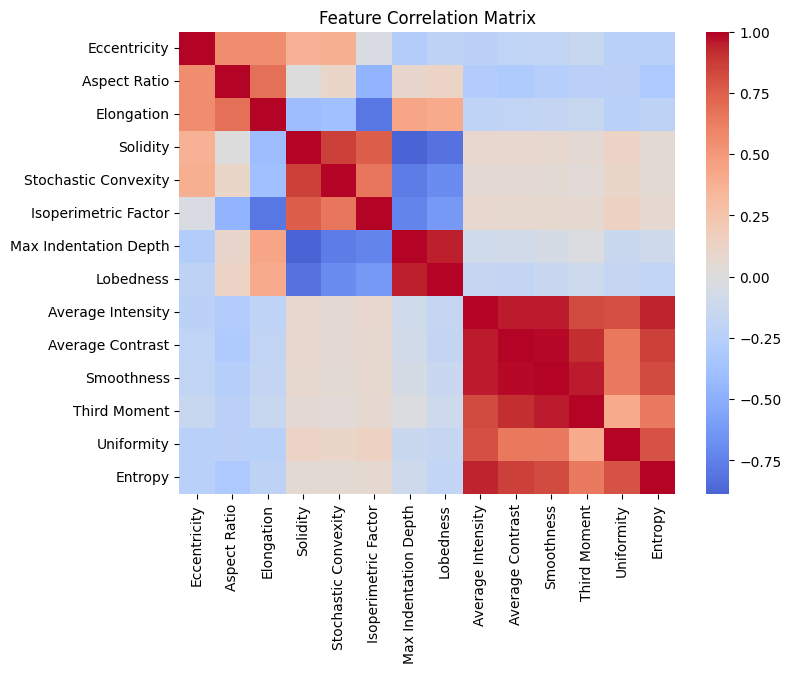

In [50]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8,6))
sns.heatmap(df_features.corr(), annot=False, cmap='coolwarm', center=0)
plt.title('Feature Correlation Matrix')
plt.show()


In [22]:
# Compute IQR
Q1 = df_scaled.quantile(0.25)
Q3 = df_scaled.quantile(0.75)
IQR = (Q3 - Q1).sort_values(ascending=False)

print("Feature IQR ranking:")
print(IQR)

Feature IQR ranking:
Eccentricity             1.656094
Isoperimetric Factor     1.629265
Average Contrast         1.553266
Elongation               1.452929
Entropy                  1.430967
Smoothness               1.399805
Average Intensity        1.397932
Third Moment             1.178010
Max Indentation Depth    0.994667
Uniformity               0.960724
Solidity                 0.753295
Aspect Ratio             0.436110
Lobedness                0.385251
Stochastic Convexity     0.293966
dtype: float64


*Eccentricity* and *Isoperimetric Factor* show the largest spread, indicating they're highly informative for separating observations in Euclidean space.

*Average Contrast* and *Entropy* also rank near the top, suggesting strong texture variability.

In [23]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca.fit(df_scaled)
loadings = pd.DataFrame(
    pca.components_.T,
    index=df_scaled.columns,
    columns=['PC1','PC2']
)
importance = loadings.abs().sum(axis=1).sort_values(ascending=False)
print("PCA‐based feature importance:")
print(importance)


PCA‐based feature importance:
Max Indentation Depth    0.597721
Solidity                 0.593417
Average Intensity        0.572408
Lobedness                0.571586
Smoothness               0.563853
Average Contrast         0.563111
Isoperimetric Factor     0.555066
Stochastic Convexity     0.542517
Entropy                  0.531049
Third Moment             0.506165
Uniformity               0.429920
Elongation               0.406595
Eccentricity             0.286251
Aspect Ratio             0.215420
dtype: float64


According to PCA *Max Indentation Depth* (shape), *Solidity* (shape), *Average Intensity* (texture) contribute most to the directions of maximal variance in the data. 

While *Lobedness* also contributes to the principal components, its IQR is narrow, suggesting its driven more by outliers than steady variation.  

Based on results of IQR and PCA, the following features appear to be the most informative features for clustering:

-  *Max Indentation Depth* (PCA 0.598, IQR ≈ 1.168)

-  *Solidity* (PCA 0.593, IQR ≈ 1.123)

-  *Average Intensity* (PCA 0.572, IQR ≈ 1.397)

-  *Average Contrast* (PCA 0.563, IQR ≈ 1.548)

-  *Isoperimetric Factor* (PCA 0.555, IQR ≈ 1.629)


In [24]:
# select key features
selected = [
    'Max Indentation Depth', 'Solidity',
    'Average Intensity', 'Average Contrast',
    'Isoperimetric Factor'
]

### Visualizations

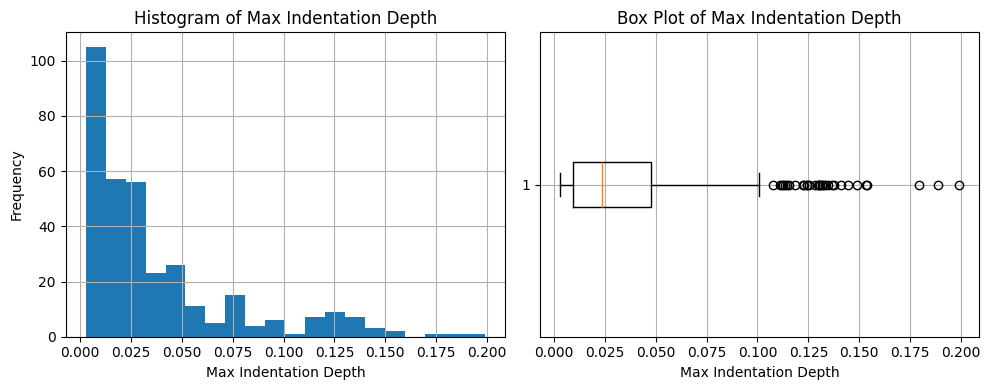

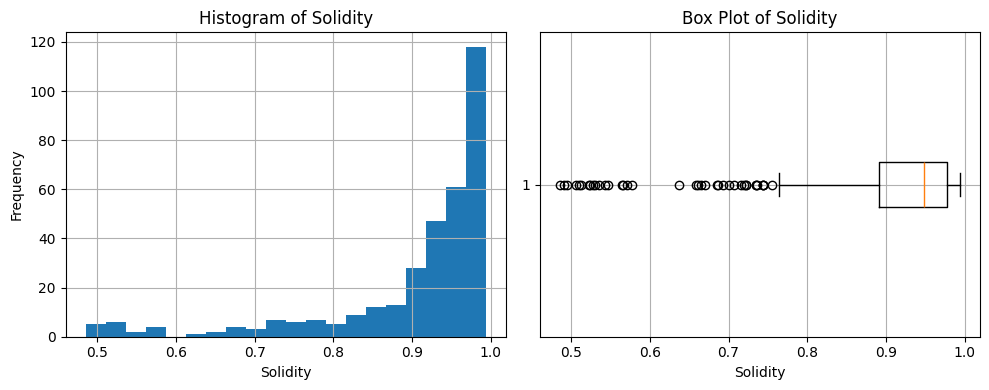

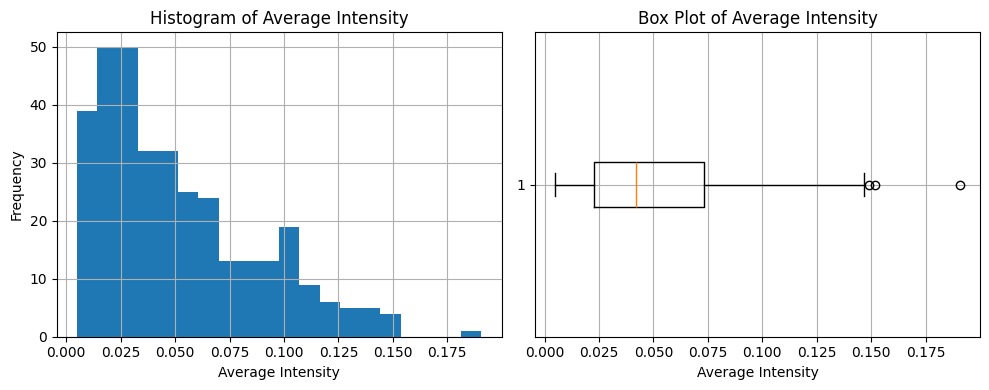

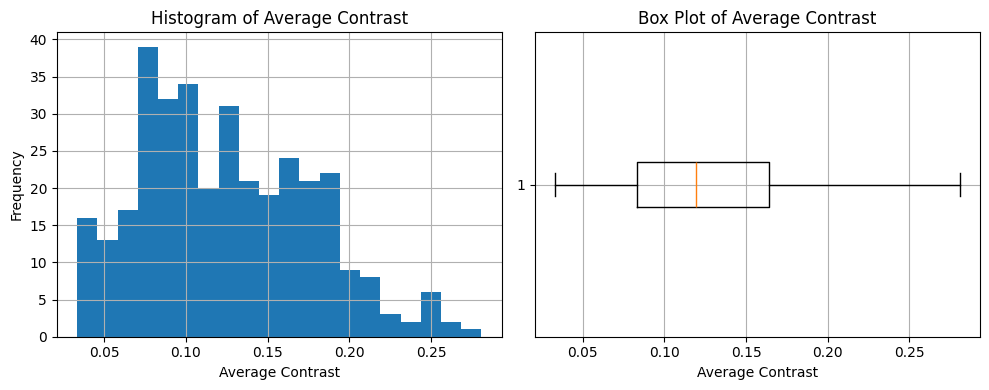

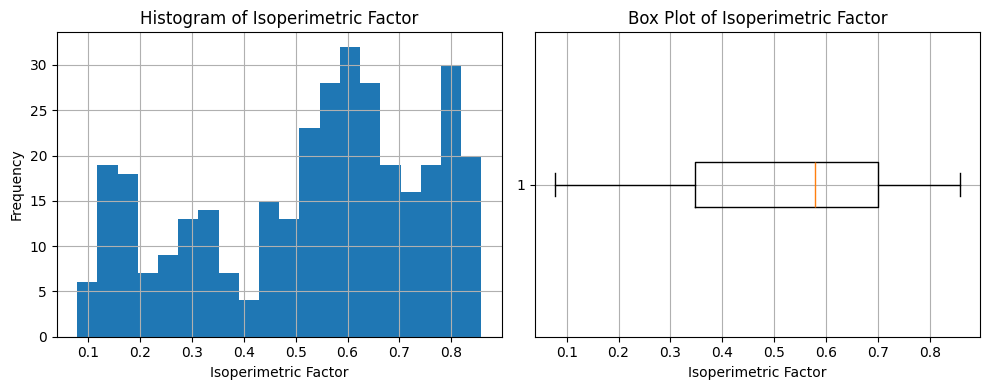

In [33]:
for feat in selected:
    fig, axs = plt.subplots(1, 2, figsize=(10, 4))
    
    # Histogram
    axs[0].hist(df_features[feat], bins=20)
    axs[0].set_title(f'Histogram of {feat}')
    axs[0].set_xlabel(feat)
    axs[0].set_ylabel('Frequency')
    axs[0].grid(True)
    
    # Boxplot
    axs[1].boxplot(df_features[feat], vert=False)
    axs[1].set_title(f'Box Plot of {feat}')
    axs[1].set_xlabel(feat)
    axs[1].grid(True)
    
    plt.tight_layout()
    plt.show()

<Figure size 1000x1000 with 0 Axes>

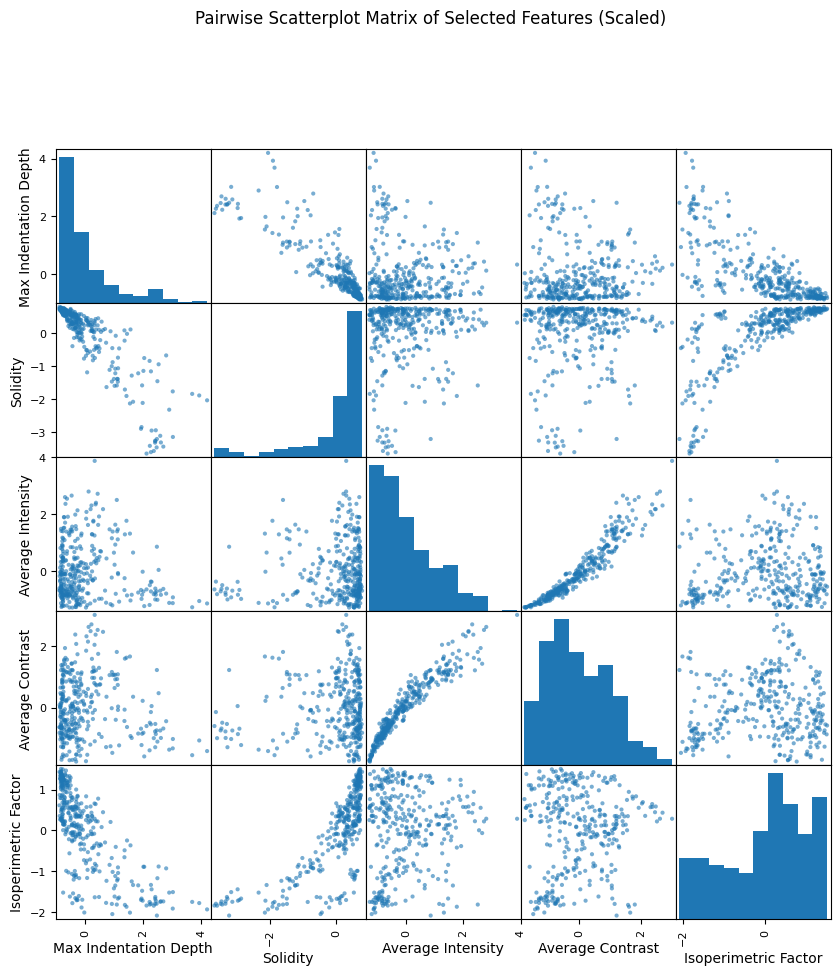

In [38]:
# pairwise plots (scaled)
plt.figure(figsize=(10, 10))
scatter_matrix(
    df_scaled[selected],
    diagonal='hist',
    alpha=0.6,
    figsize=(10, 10),
    grid=True
)
plt.suptitle('Pairwise Scatterplot Matrix of Selected Features (Scaled)', y=1.02)
plt.show()

**Max Indentation Depth vs. Solidity**
-  Strong negative cloud (upper‐left to lower‐right)
-  Deeper lobing: high indentation almost always means lower solidity


**Average Intensity vs. Average Contrast**
-  Very tight positive trend 
-   intensity and contrast move together—leaves that scan brighter also show more texture variation.

**Max Indentation Depth vs. Isoperimetric Factor**	
-  Down‐tilted arc (higher indentation → lower iso)
-  As indentations grow, overall shape complexity (iso) initially drops then rises with extreme lobing.

**Solidity vs. Average Intensity/Contrast**	
-  Broad clouds with slight tilt	
-  Very solid leaves show a range of intensity/contrast; concave leaves cover the full texture spectrum.

## Determining optimal k for k-Means

### Elbow Method

In [40]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Compute within-cluster sum of squares (inertia) for k = 1 through 10
inertias = []
for k in range(1, 11):
    km = KMeans(n_clusters=k, random_state=42)
    km.fit(df_scaled[selected])
    inertias.append(km.inertia_)


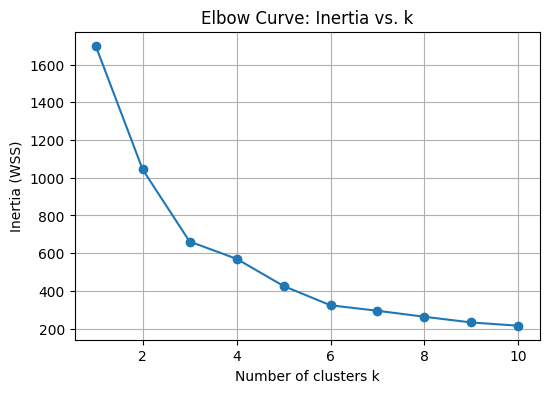

In [41]:
# plot elbow method
plt.figure(figsize=(6,4))
plt.plot(range(1,11), inertias, marker='o')
plt.title('Elbow Curve: Inertia vs. k')
plt.xlabel('Number of clusters k')
plt.ylabel('Inertia (WSS)')
plt.grid(True)
plt.show()

The plot of inertia versus the number of clusters k shows steep decline from k=1 to k=3, and elbowing around k=4. After 4 clusters, the inertia reduction does not appear to be large. 

### Silhouette Scores

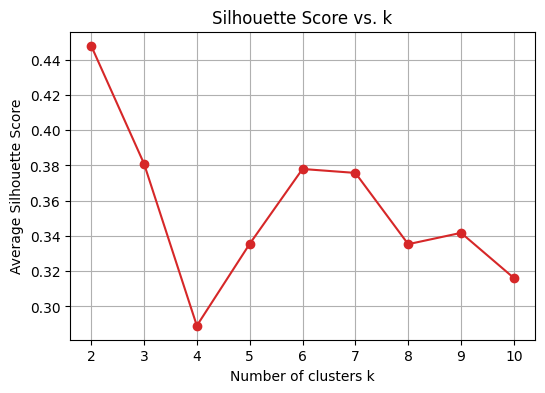

Optimal k by silhouette: 2


In [42]:
# Compute silhouette scores for k = 2…10
sil_scores = []
for k in range(2, 11):
    km = KMeans(n_clusters=k, random_state=42)
    labels = km.fit_predict(df_scaled[selected])
    sil_scores.append(silhouette_score(df_scaled[selected], labels))

# Plot Silhouette Scores
plt.figure(figsize=(6,4))
plt.plot(range(2,11), sil_scores, marker='o', color='C3')
plt.title('Silhouette Score vs. k')
plt.xlabel('Number of clusters k')
plt.ylabel('Average Silhouette Score')
plt.grid(True)
plt.show()

# 5. Optimal k according to silhouette
optimal_k = range(2,11)[sil_scores.index(max(sil_scores))]
print(f"Optimal k by silhouette: {optimal_k}")

The plot of average silhouette scores versus the number of clusters k shows:

-  Highest score at k=2 

A two-cluster solution yields the most cohesive and well-separated groups, as indicated by the peak score. However, splitting the leaves into just “Group A” and “Group B” may be too broad to capture meaningful biological or morphological nuance.

-  Dip at k=4

The silhouette score falls to its minimum at four clusters, suggesting that four-way splits are somewhat less distinct than two or three clusters.

-  Secondary Peaks at k=6 and k=7

The next best separation occurs at six clusters—nearly matching k=3 in cohesion and separation. 

In general, after the sharp drop from k=3 to k=4, silhouette scores gradually rise, but never exceed k=2. 


To ensure we aren't missing any orthogonal structures, we'll rerun the elbow method and silhouette analysis with all 14 features. 

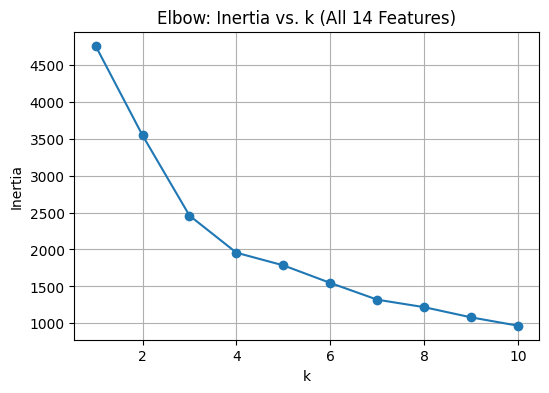

In [43]:
# Elbow on all features
inertias = [KMeans(n_clusters=k, random_state=42)
                .fit(df_scaled).inertia_
            for k in range(1, 11)]

plt.figure(figsize=(6,4))
plt.plot(range(1,11), inertias, 'o-')
plt.title('Elbow: Inertia vs. k (All 14 Features)')
plt.xlabel('k')
plt.ylabel('Inertia')
plt.grid(True)
plt.show()


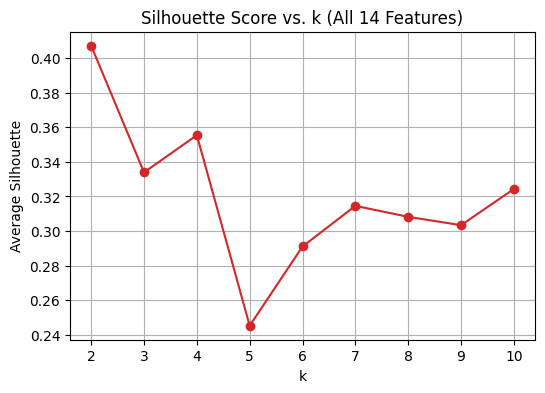

In [44]:
# Silhouette on all features
sil_scores = [silhouette_score(df_scaled, 
                  KMeans(n_clusters=k, random_state=42)
                    .fit_predict(df_scaled))
              for k in range(2, 11)]

plt.figure(figsize=(6,4))
plt.plot(range(2,11), sil_scores, 'o-', color='C3')
plt.title('Silhouette Score vs. k (All 14 Features)')
plt.xlabel('k')
plt.ylabel('Average Silhouette')
plt.grid(True)
plt.show()

-  With all 14 features, ,the average silhouette scores drop across most k, meaning that including the additional features slightly blur the cluster boundaries and reduce cohesion. 
-  While the peak at k=2 still remains the highest, it is too broad to consider. 
-  With all 14 features, the trough moves from k=4 to k=5, with a peak occuring at k=4, meaning that including all features strengthens distinction at four clusters. Some secondary features (most likely Lobedness or Elongation, per initial exploration) complements the primary dimensions and adds structure. 
-  All 14 features more neatly aligns with the elbow plot interpretation (k=4), albeit introduces noise. 

**Recommendation**: The elbow and the key feature silhouette both indicate an ideal k at k=4. Five key features (Max Indentation Depth, Solidity, Average Intensity, Average Contrast, Isoperimetric Factor) present clusters, but full-feature solution modestly enhances cohesion albeit adds noise. 

### Visualizing k=4 Clusters

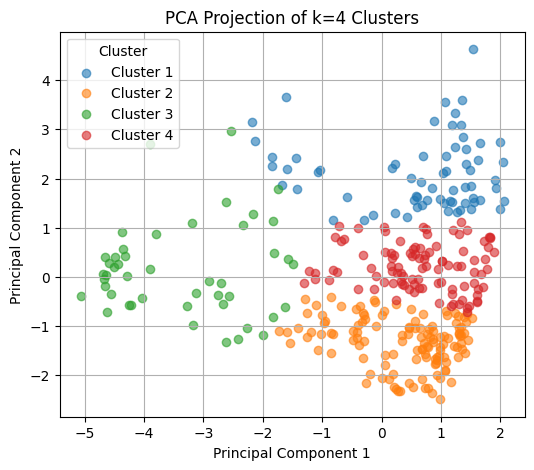

In [47]:
# load libraries
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

#Fit k-means with k=4
km4 = KMeans(n_clusters=4, random_state=42)
labels4 = km4.fit_predict(df_scaled[selected])

# Perform PCA to 2 components
pca = PCA(n_components=2, random_state=42)
X_pca = pca.fit_transform(df_scaled[selected])

# Plot PCA scatter, colored by cluster label
plt.figure(figsize=(6,5))
for cluster in range(4):
    mask = labels4 == cluster
    plt.scatter(
        X_pca[mask, 0],
        X_pca[mask, 1],
        alpha=0.6,
        label=f'Cluster {cluster+1}'
    )
plt.title('PCA Projection of k=4 Clusters')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Cluster')
plt.grid(True)
plt.show()

In [49]:
loadings = pd.DataFrame(
    pca.components_.T,
    index=selected,
    columns=['PC1', 'PC2']
)

print(loadings)

                            PC1       PC2
Max Indentation Depth -0.562895  0.164466
Solidity               0.566091 -0.170663
Average Intensity      0.202575  0.677381
Average Contrast       0.201230  0.677946
Isoperimetric Factor   0.530246 -0.159276


### PC1 Interpretation
#### Positive contributors

**Solidity** (0.5661) and **Isoperimetric Factor** (0.5302) are the largest positive weights.

**Average Intensity** and **Average Contrast** have moderate positive weights (~0.20).

#### Negative contributor

**Max Indentation Depth** (–0.5629) is the largest negative weight.

As you moving along the PC1 axis, you see higher solidity (i.e. smoother, more convex leaves), higher isoperimetri factor (rounded outline), slightly higher intensity and contrast, and lower max indentation depth (i.e. more shallow lobing).

### PC2 Interpretation
#### Primary contributors

**Average Contrast** (0.6779) and **Average Intensity** (0.6774) are very large, nearly equal.

#### Minor negative contributors

**Solidity** (–0.1707) and **Isoperimetric Factor** (–0.1593)

**Max Indentation Depth** (+0.1645)

⇒ Moving up along PC2 means:
As you move up PC2, texture brightness and contrast increases, solidity slightly decreases and has slightly more indentation. 

#### PC1 mostly captures the shape continuum, and PC2 mostly captures the texture continuum. 

### PCA Plot 

A point in the upper‐left (low PC1, high PC2) is a deeply lobed, highly textured leaf.

A point in the upper‐right (high PC1, high PC2) is a smooth‐edged, highly textured leaf.

A point in the lower‐right (high PC1, low PC2) is a smooth‐edged, muted‐texture leaf. 

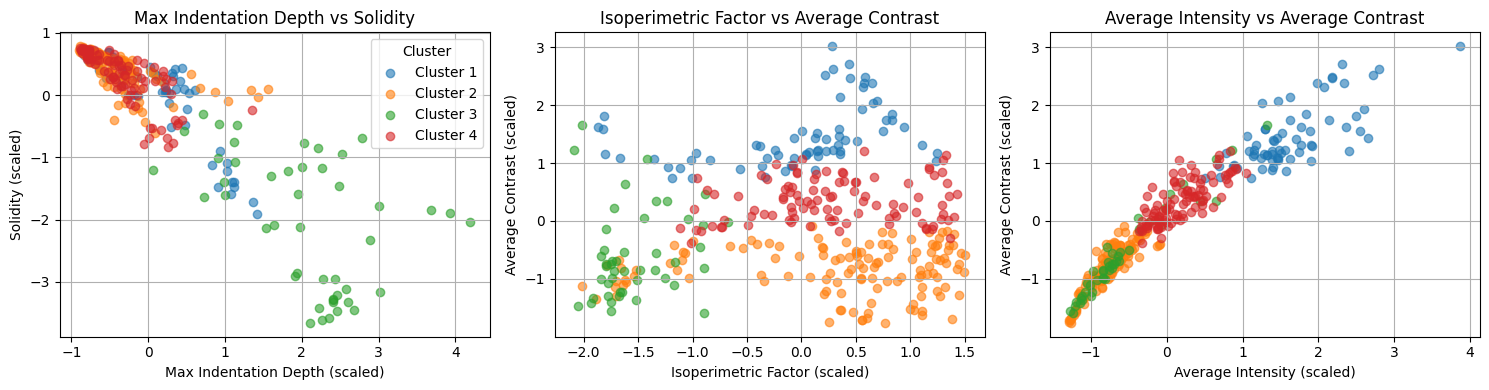

In [48]:
pairs = [
    ('Max Indentation Depth', 'Solidity'),
    ('Isoperimetric Factor', 'Average Contrast'),
    ('Average Intensity', 'Average Contrast')
]

# Create a 1×3 grid of scatter plots
fig, axes = plt.subplots(1, 3, figsize=(15, 4), sharey=False)

for ax, (x_feat, y_feat) in zip(axes, pairs):
    for cluster in range(4):
        mask = (labels4 == cluster)
        ax.scatter(
            df_scaled.loc[mask, x_feat],
            df_scaled.loc[mask, y_feat],
            alpha=0.6,
            label=f'Cluster {cluster+1}'
        )
    ax.set_title(f'{x_feat} vs {y_feat}')
    ax.set_xlabel(f'{x_feat} (scaled)')
    ax.set_ylabel(f'{y_feat} (scaled)')
    ax.grid(True)
    
axes[0].legend(loc='best', title='Cluster')
plt.tight_layout()
plt.show()

### Distance-based metrics 

In [60]:
import numpy as np

# Compute overall mean of the selected features (original scale)
overall_mean = df_scaled[selected].mean().values  # df_sel is the raw-data DataFrame of selected features

# Compute TSS: sum of squared distances from each point to overall mean
tss = np.sum((df_scaled[selected].values - overall_mean) ** 2)

# WSS: use k-means inertia (already computed)
wss = km4.inertia_

# BSS: TSS minus WSS
bss = tss - wss

# Proportion of variance explained by clusters
r_squared = bss / tss

print(f"TSS: {tss:.2f}")
print(f"WSS (inertia): {wss:.2f}")
print(f"BSS: {bss:.2f}")
print(f"R² (BSS/TSS): {r_squared:.3f}")


TSS: 1700.00
WSS (inertia): 570.40
BSS: 1129.60
R² (BSS/TSS): 0.664


R² = 0.664 indicates that 66.4% of the total variance in the selected feature space is explained by the clustering. The four‐cluster solution captures a substantial portion of the structure in leaf morphology and texture, corroborating the elbow and silhouette diagnostics and the clear separation seen in our PCA and feature‐pair visualizations.

### Anomaly Detection

Number of anomalies detected: 7


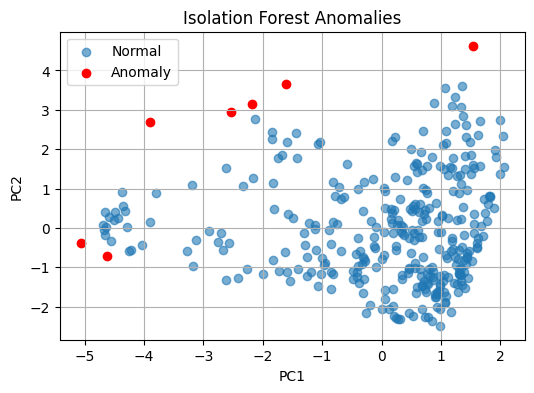

In [53]:
from sklearn.ensemble import IsolationForest

# Fit on all selected features (scaled)
iso = IsolationForest(contamination=0.02, random_state=42)
df_scaled['anomaly_flag'] = iso.fit_predict(df_scaled[selected])

# Count anomalies
n_anom = (df_scaled['anomaly_flag'] == -1).sum()
print(f"Number of anomalies detected: {n_anom}")

# Visualize anomalies in PCA space
from sklearn.decomposition import PCA
pca = PCA(n_components=2, random_state=42)
coords = pca.fit_transform(df_scaled[selected])

plt.figure(figsize=(6,4))
plt.scatter(coords[df_scaled['anomaly_flag']==1, 0],
            coords[df_scaled['anomaly_flag']==1, 1],
            alpha=0.6, label='Normal')
plt.scatter(coords[df_scaled['anomaly_flag']==-1, 0],
            coords[df_scaled['anomaly_flag']==-1, 1],
            color='red', label='Anomaly')
plt.title('Isolation Forest Anomalies')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend()
plt.grid(True)
plt.show()

Isolation Forest flags approximately 2% (7 out of 340) of leaf observations (in red) as anomalies when promjecting into the first two principal components. Anomalies lie on the periphery rather than intermingled with the main clusters, thus pose minimal risk to the overall cluster structure. 